In [2]:
print("All ok")

All ok


In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv(r'../../Datasets/linear_assumptions.csv')
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [5]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
x.head()

,feature1,feature2,feature3
0,-0.570563,1.420342,0.495580
1,-0.990563,0.556965,1.045064
2,-0.674728,0.150617,1.774645
3,0.388250,-0.387127,-0.110229
4,1.167882,-0.024104,0.145063


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [9]:
lr=LinearRegression()
lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)

In [10]:
residual=y_test-y_pred

### 1. Linear Relationship between input and optput columns
input col should be linear relationship with output col

Text(0.5, 1.0, 'feature3')

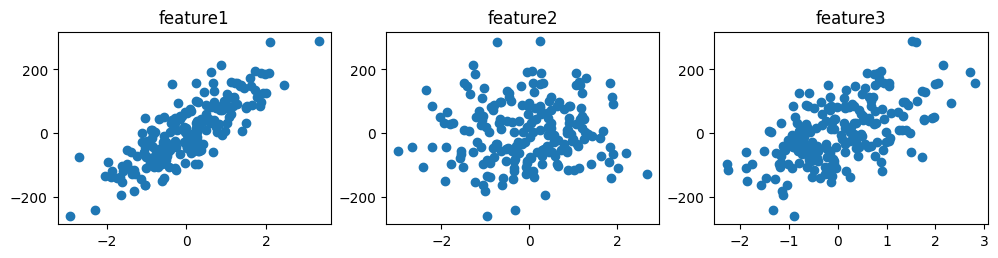

In [11]:
fig,(ax1,ax2,ax3)=plt.subplots(ncols=3,figsize=(12,2.5))

ax1.scatter(df['feature1'],df['target'])
ax1.set_title("feature1")
ax2.scatter(df['feature2'],df['target'])
ax2.set_title("feature2")
ax3.scatter(df['feature3'],df['target'])
ax3.set_title("feature3")

### 2. NO Multicolinearity

a. No relationship between the input cols

b. Input cols should be identical to each other

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
x_train.shape

(160, 3)

In [14]:
vif=[]
for i in range(x_train.shape[1]):
    vif.append(variance_inflation_factor(x_train,i))

In [15]:
vif

[np.float64(1.0034818679179152),
 np.float64(1.0052736607332797),
 np.float64(1.0065638547636795)]

In [ ]:
pd.DataFrame({'vif': vif},index=df.columns[0:3]).T  # if vif value is more than or nearly 5 then col is correlated input col

,feature1,feature2,feature3
vif,1.003482,1.005274,1.006564


<Axes: >

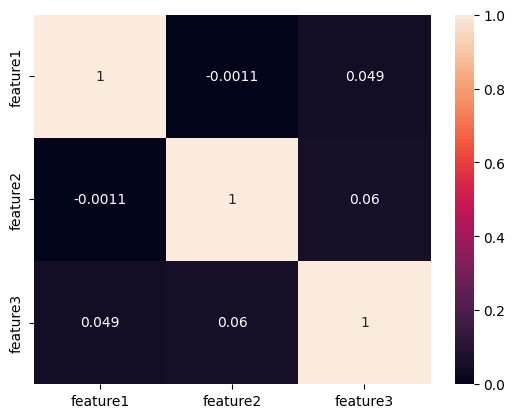

In [17]:
# Another way of checking correlianity

sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

### 3. Normality of Residuals

Residuals should be normally distributed

<Axes: xlabel='target', ylabel='Density'>

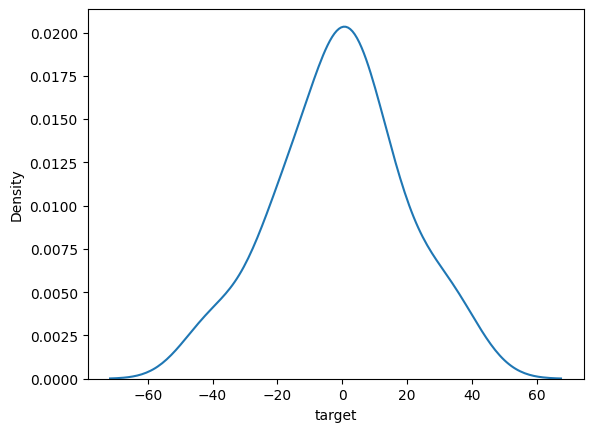

In [20]:
# Using kde plot
sns.kdeplot(residual)

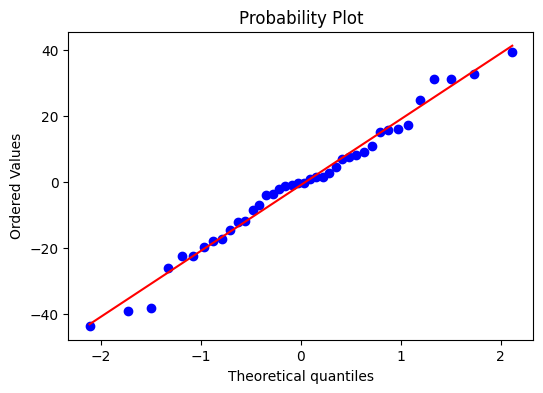

In [22]:
## using QQ plot

import scipy as sp

fig,ax=plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)
plt.show()

### 4. Homoscedasticity

There is no relation between predicted value and residuals

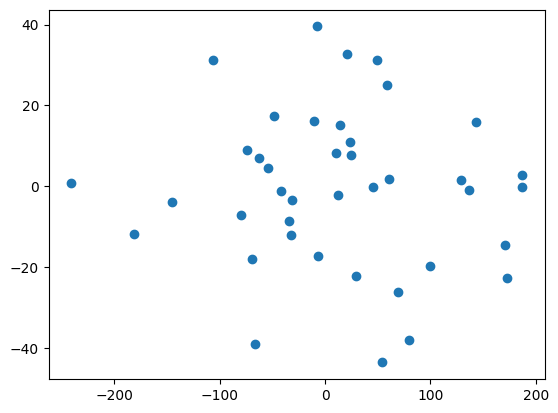

In [23]:
plt.scatter(y_pred,residual)

### 5. No autocorrelation between errors

There is no relations between each error

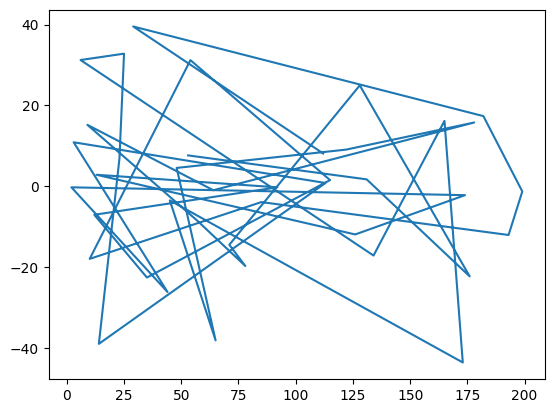

In [28]:
plt.plot(residual)

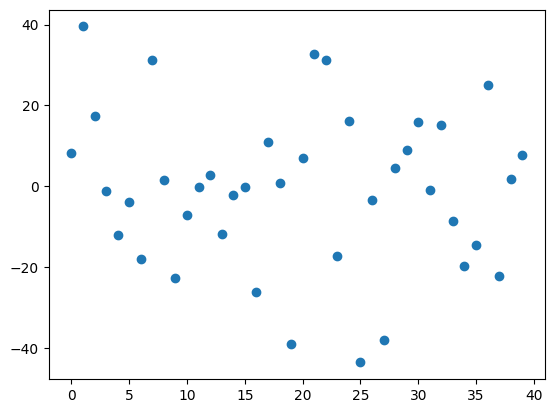

In [ ]:

plt.scatter(range(len(x_test)),residual)